<a href="https://colab.research.google.com/github/ravigithubshankar/Self-Supervised-for-Molecular-Property-prediction-using-Pretrained-DeBERTA-Transformer/blob/main/Self_Supervised_for_Molecular_Property_prediction_using_Pretrained_DeBERTA_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0   8858      0 --:--:-- --:--:-- --:--:--  8864


In [63]:
!pip install --pre deepchem
import deepchem
!pip install bertviz


In [7]:
!git clone https://github.com/deepchem/deepchem.git

Cloning into 'deepchem'...
remote: Enumerating objects: 67240, done.
remote: Counting objects: 100% (2736/2736), done.
remote: Compressing objects: 100% (734/734), done.
remote: Total 67240 (delta 2014), reused 2619 (delta 1973), pack-reused 64504
Receiving objects: 100% (67240/67240), 526.72 MiB | 14.86 MiB/s, done.
Resolving deltas: 100% (51514/51514), done.
Updating files: 100% (1221/1221), done.


In [8]:

%cd deepchem/
!ls



/content/deepchem
CODE_OF_CONDUCT.md  CONTRIBUTING.md  deepchem  docs	 LICENSE  README.md	scripts    setup.py
contrib		    datasets	     docker    examples  notes	  requirements	setup.cfg


In [84]:
!python setup.py install
!pip install dgllife
pip install dgl

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [10]:
!git clone https://github.com/NVIDIA/apex
!cd /content/apex
!pip install -v --no-cache-dir /content/apex
!pip install transformers
!pip install simpletransformers
!pip install wandb
!cd ..

Cloning into 'apex'...
remote: Enumerating objects: 11537, done.
remote: Counting objects: 100% (3605/3605), done.
remote: Compressing objects: 100% (515/515), done.
remote: Total 11537 (delta 3277), reused 3192 (delta 3087), pack-reused 7932
Receiving objects: 100% (11537/11537), 15.43 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (8106/8106), done.
/bin/bash: line 1: cd: /content/apex: No such file or directory
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
ERROR: Invalid requirement: '/content/apex'
Hint: It looks like a path. File '/content/apex' does not exist.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoModelForMaskedLM,AutoTokenizer,pipeline,DebertaModel,DebertaTokenizer
import torch
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import rdFMCS
from matplotlib import colors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolToImage
from PIL import Image
from transformers import AutoModelForMaskedLM,AutoTokenizer,pipeline,DebertaModel,DebertaTokenizer
from bertviz import head_view
import dgllife
print(dgllife.__version__)
import os
import numpy as np
import dgl
import pandas as pd
from typing import List
from deepchem.molnet import load_bbbp,load_clearance,load_clintox,load_hiv,load_qm7,load_delaney
from dgllife.data import Tox21,ESOL

In [12]:
#from apex import amp
from transformers import AutoModelForMaskedLM,AutoTokenizer,pipeline,DebertaModel,DebertaTokenizer

model=AutoModelForMaskedLM.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")
tokenizer = AutoTokenizer.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")

fill_mask = pipeline('fill-mask', model=model, tokenizer=tokenizer)

config.json:   0%|          | 0.00/515 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of the model checkpoint at seyonec/PubChem10M_SMILES_BPE_450k were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/165k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/101k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
smiles_mask = "C1=CC=CC<mask>C1"
smiles = "C1=CC=CC=C1"

masked_smi = fill_mask(smiles_mask)

for smi in masked_smi:
  print(smi)

{'score': 0.9755935668945312, 'token': 33, 'token_str': '=', 'sequence': 'C1=CC=CC=C1'}
{'score': 0.020923839882016182, 'token': 7, 'token_str': '#', 'sequence': 'C1=CC=CC#C1'}
{'score': 0.0007658926770091057, 'token': 21, 'token_str': '1', 'sequence': 'C1=CC=CC1C1'}
{'score': 0.0004129754670429975, 'token': 22, 'token_str': '2', 'sequence': 'C1=CC=CC2C1'}
{'score': 0.00025319066480733454, 'token': 352, 'token_str': '=[', 'sequence': 'C1=CC=CC=[C1'}


In [ ]:



def mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    Chem.Kekulize(mol)
    return mol


def matches_one(mol,submol):
    #find all matching atoms for each submol in submol_list in mol.
    match_dict = {}
    mols = [mol,submol] #pairwise search
    res=rdFMCS.FindMCS(mols) #,ringMatchesRingOnly=True)
    mcsp = Chem.MolFromSmarts(res.smartsString)
    matches = mol.GetSubstructMatches(mcsp)
    return matches

def get_image(mol,atomset):
    hcolor = colors.to_rgb('green')
    if atomset is not None:
        #highlight the atoms set while drawing the whole molecule.
        img = MolToImage(mol, size=(600, 600),fitImage=True, highlightAtoms=atomset,highlightColor=hcolor)
    else:
        img = MolToImage(mol, size=(400, 400),fitImage=True)
    return img



In [ ]:
sequence = f"Cc1=oc=cc={tokenizer.mask_token}1"
substructure = "CC=CC"
image_list = []

input = tokenizer.encode(sequence, return_tensors="pt")
mask_token_index = torch.where(input == tokenizer.mask_token_id)[1]

token_logits = model(input)[0]
mask_token_logits = token_logits[0, mask_token_index, :]

top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
  smi = (sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))
  print (smi)
  smi_mol = mol(smi)
  substructure_mol = mol(substructure)
  if smi_mol is None: # if the model's token prediction isn't chemically feasible
    continue
  Draw.MolToFile(smi_mol, smi+".png")
  matches = matches_one(smi_mol, substructure_mol)
  atomset = list(matches[0])
  img = get_image(smi_mol, atomset)
  img.format="PNG"
  image_list.append(img)

Cc1=oc=cc=NCC1
Cc1=oc=cc=S1
Cc1=oc=cc=NC1
Cc1=oc=cc=cs1
Cc1=oc=cc=s1


[16:23:19] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[16:23:19] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[16:23:19] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[16:23:19] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6
[16:23:19] Can't kekulize mol.  Unkekulized atoms: 3 4 5


In [14]:

model_version='seyonec/PubChem10M_SMILES_BPE_450K'
model=DebertaModel.from_pretrained(model_version,output_attentions=True)
tokenizer=DebertaTokenizer.from_pretrained(model_version)

config.json:   0%|          | 0.00/515 [00:00<?, ?B/s]

You are using a model of type roberta to instantiate a model of type deberta. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of DebertaModel were not initialized from the model checkpoint at seyonec/PubChem10M_SMILES_BPE_450K and are newly initialized: ['encoder.layer.2.output.LayerNorm.bias', 'encoder.layer.1.attention.self.q_bias', 'encoder.layer.1.output.dense.weight', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.1.output.dense.bias', 'encoder.layer.5.attention.output.dense.bias', 'encoder.layer.4.attention.output.dense.bias', 'encoder.layer.5.attention.output.dense.weight', 'encoder.layer.5.attention.output.LayerNorm.weight', 'encoder.layer.2.attention.self.v_bias', 'encoder.layer.3.attention.self.q_bias', 'encoder.layer.5.output.LayerNorm.weight', 'encoder.layer.4.attention.self.v_bias', 'encoder.layer.3.attention.output.dense.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.3.intermediate.dense.bias', 'encoder.layer.1.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.2.output.dense.weight', 'encoder.layer.4.attention.self.q_bias'

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/165k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/101k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'DebertaTokenizer'.


In [ ]:
def html():

  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.8/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))


In [ ]:
sentence_1="CCCC[C@@H] (Br) CC"
sentence_2="CCCC[C@H] (Br)CC"
sentence_3="CCCCC[C@H] (Br)CC"
inputs=tokenizer.encode_plus(sentence_1,sentence_2,sentence_3,return_tensors="pt")
input_ids=inputs['input_ids']
attention=model(input_ids)[-1]
input_id_list=input_ids[0].tolist()
tokens=tokenizer.convert_ids_to_tokens(input_id_list)
html()
head_view(attention,tokens)

<IPython.core.display.Javascript object>

In [85]:

delaney_tasks, delaney_datasets, transformers = dc.molnet.load_delaney(
    featurizer='GraphConv', split='index')
train_dataset, valid_dataset, test_dataset = delaney_datasets

In [86]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)

n_atom_feat = 75
batch_size = 64

max_atoms_train = max([mol.get_num_atoms() for mol in train_dataset.X])
max_atoms_valid = max([mol.get_num_atoms() for mol in valid_dataset.X])
max_atoms_test = max([mol.get_num_atoms() for mol in test_dataset.X])
max_atoms = max([max_atoms_train, max_atoms_valid, max_atoms_test])

reshard_size = 512
transformer = dc.trans.DAGTransformer(max_atoms=max_atoms)
train_dataset.reshard(reshard_size)
train_dataset = transformer.transform(train_dataset)
valid_dataset.reshard(reshard_size)
valid_dataset = transformer.transform(valid_dataset)


In [87]:
import logging
logging.basicConfig(level=logging.INFO)

model = dc.models.DAGModel(
    len(delaney_tasks),
    max_atoms=max_atoms,
    n_atom_feat=n_atom_feat,
    batch_size=batch_size,
    learning_rate=1e-3,
    use_queue=False,
    mode='regression')

# Fit trained model
model.fit(train_dataset, nb_epoch=10)

0.06491978168487549

In [88]:
print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric], transformers)
valid_scores = model.evaluate(valid_dataset, [metric], transformers)

print("Train scores")
print(train_scores)

print("Validation scores")
print(valid_scores)

Evaluating model
Train scores
{'mean-pearson_r2_score': 0.9562262257628752}
Validation scores
{'mean-pearson_r2_score': 0.8650868743774701}


In [89]:
model.fit(train_dataset, nb_epoch=100)

0.0018915285170078278

In [92]:
print(f"Evaluating Model")
train_scores=model.evaluate(train_dataset,[metric],transformers)
valid_scores=model.evaluate(valid_dataset,[metric],transformers)
print(f"-----------Train scores-----------")
print(train_scores)
print(f"----------validation scores--------")
print(valid_scores)

Evaluating Model
-----------Train scores-----------
{'mean-pearson_r2_score': 0.9982894913158641}
----------validation scores--------
{'mean-pearson_r2_score': 0.870835843795372}


True Value: [-1.00120698], Predicted Value: -4.671180315098373


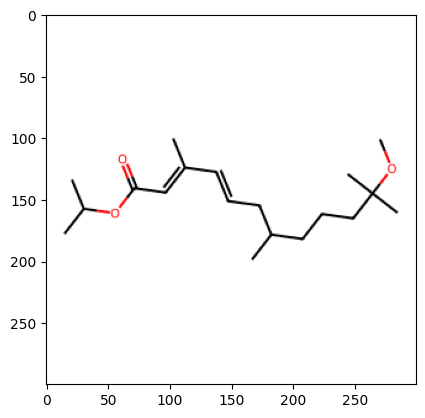

True Value: [1.14319742], Predicted Value: -0.7319707938439666


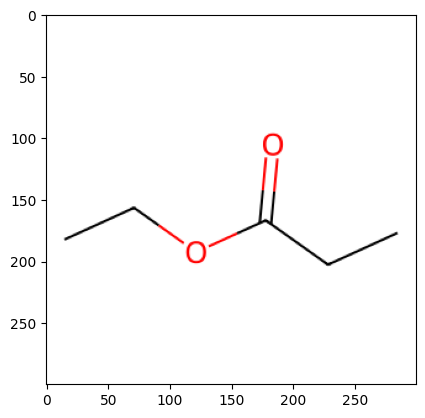

True Value: [-0.48522446], Predicted Value: -3.235873908298328


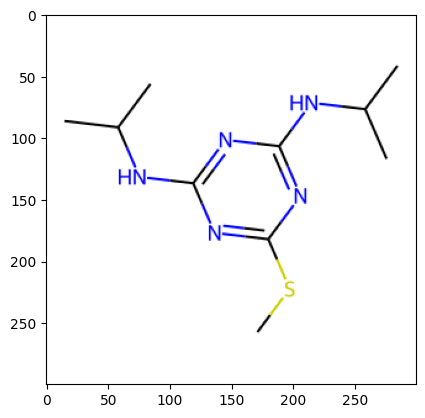

True Value: [-0.39054877], Predicted Value: -3.739153677314805


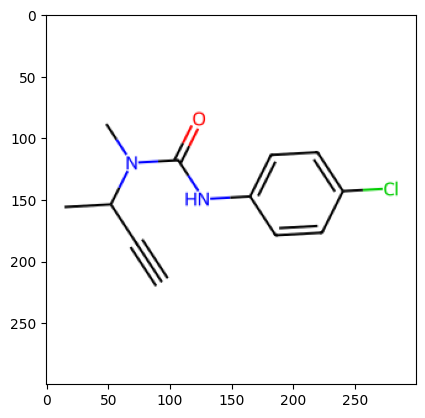

True Value: [-0.7787191], Predicted Value: -4.623793095328311


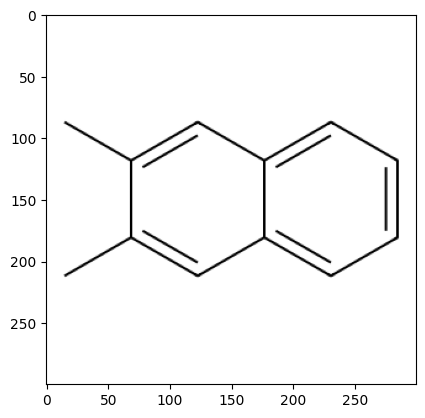

True Value: [-1.50298814], Predicted Value: -6.252365578001598


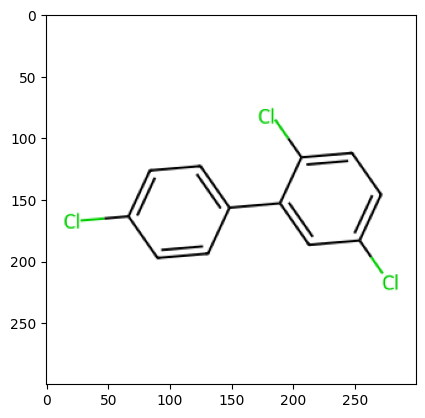

True Value: [-2.04263958], Predicted Value: -8.727643326056873


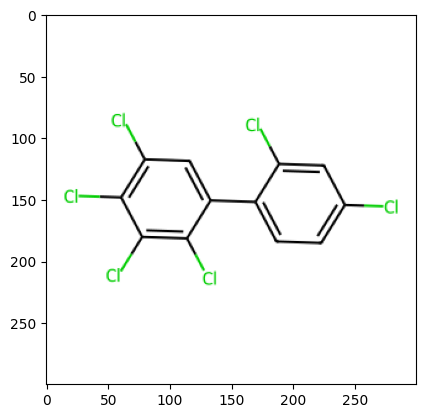

True Value: [1.30887988], Predicted Value: -0.2452300047467122


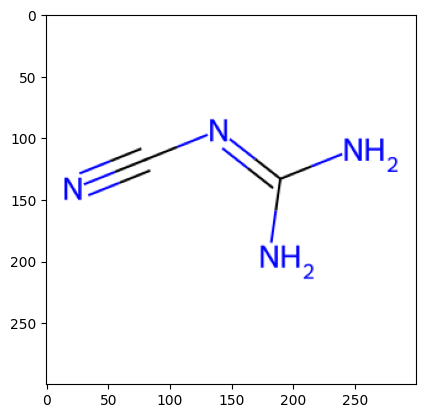

True Value: [0.50887029], Predicted Value: -2.456410895354315


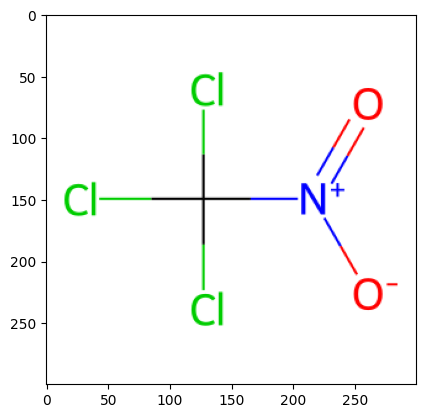

True Value: [-1.01067455], Predicted Value: -5.401560575472837


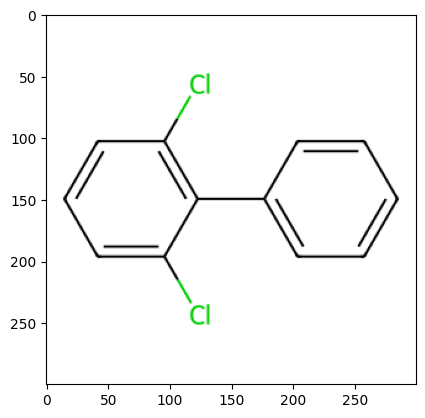

True Value: [0.7502933], Predicted Value: -1.8126348121127356


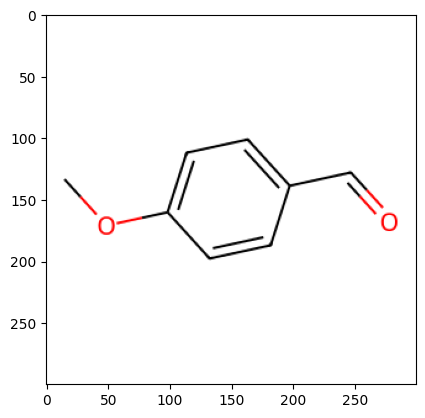

True Value: [0.1812924], Predicted Value: -2.707160187200616


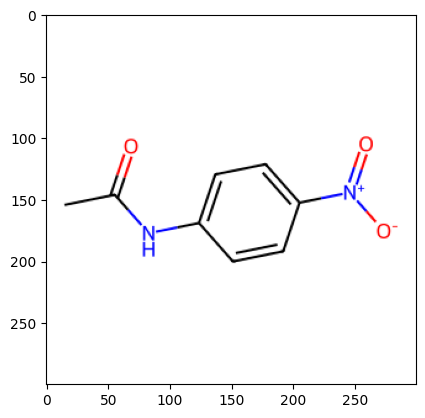

True Value: [0.15857024], Predicted Value: -2.54581557321662


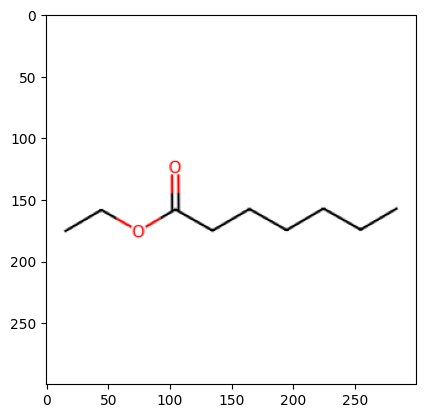

True Value: [0.96804739], Predicted Value: -1.8859499733301588


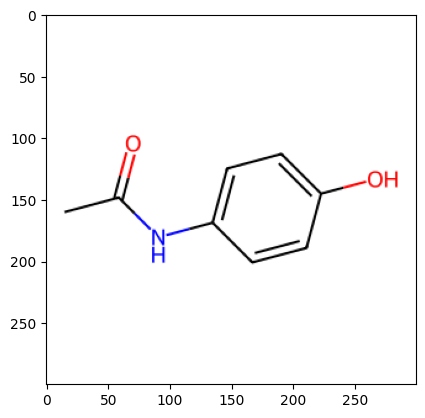

True Value: [0.43312974], Predicted Value: -0.5061629127157588


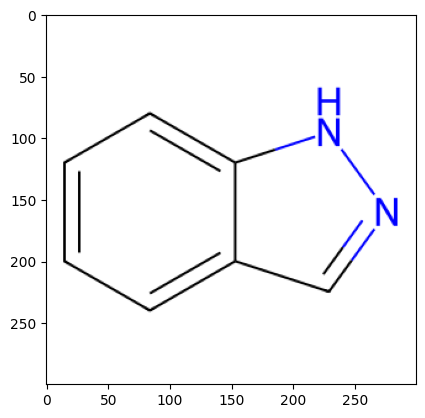

True Value: [-0.58463394], Predicted Value: -4.876921770862037


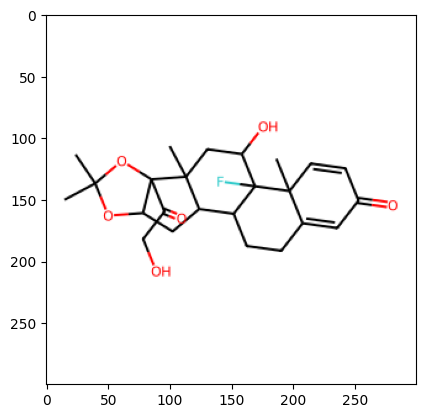

True Value: [-0.2404878], Predicted Value: -1.6095936930459291


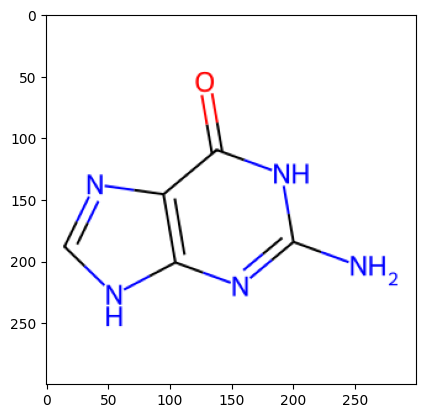

True Value: [1.67338129], Predicted Value: 0.5396077591897526


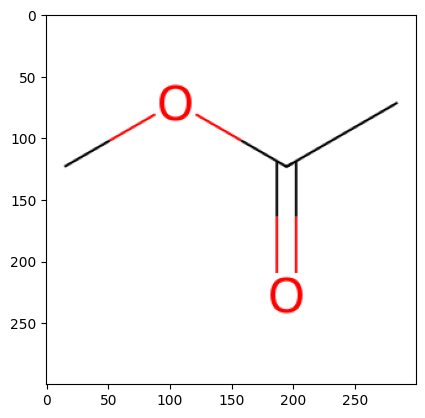

True Value: [-0.78960681], Predicted Value: -4.031582287078052


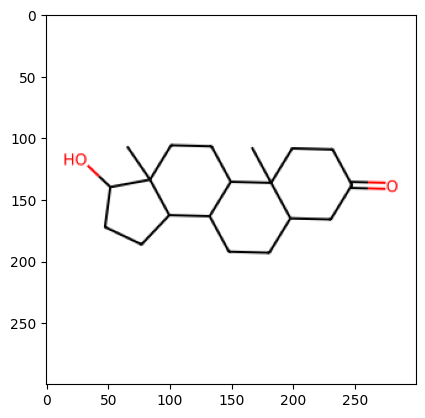

True Value: [1.17633391], Predicted Value: -0.8918688528460619


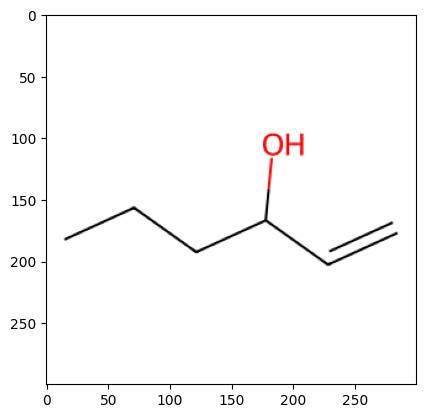

True Value: [-0.4052235], Predicted Value: -4.467284118790666


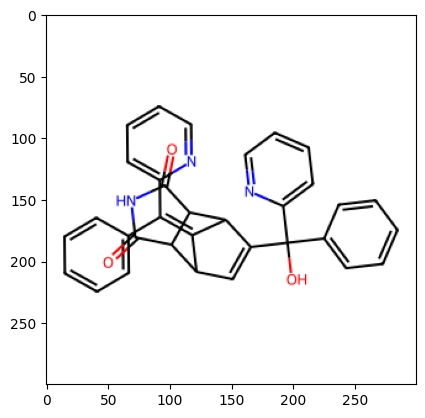

True Value: [0.57987706], Predicted Value: -2.712144213474592


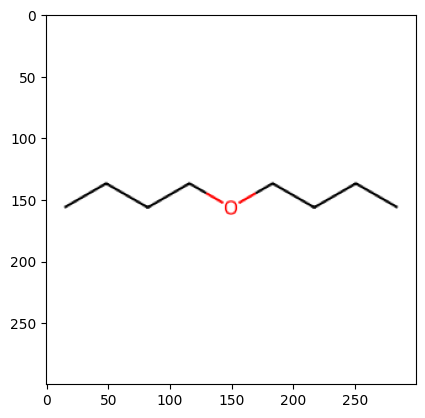

True Value: [-0.81658938], Predicted Value: -5.0635551274105435


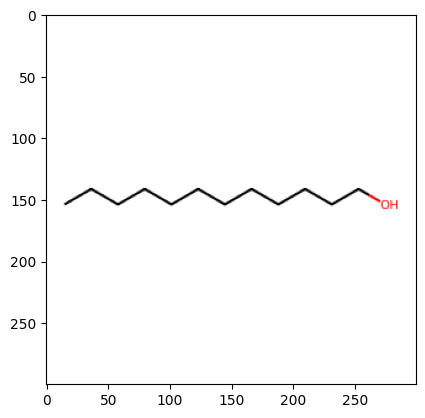

True Value: [-0.13492441], Predicted Value: -3.886742703638949


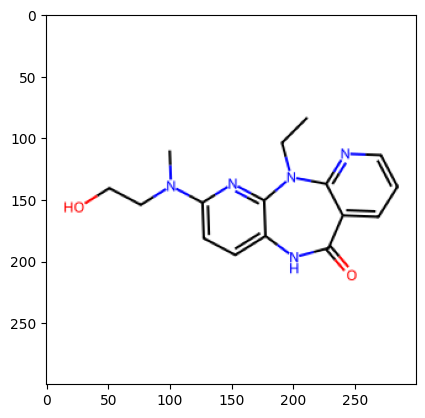

True Value: [1.22367176], Predicted Value: -0.31901444484454133


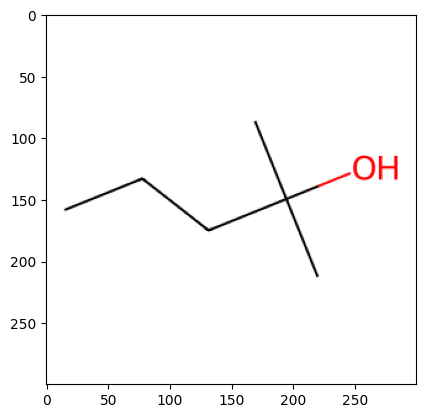

True Value: [0.99550334], Predicted Value: -1.3776083793575935


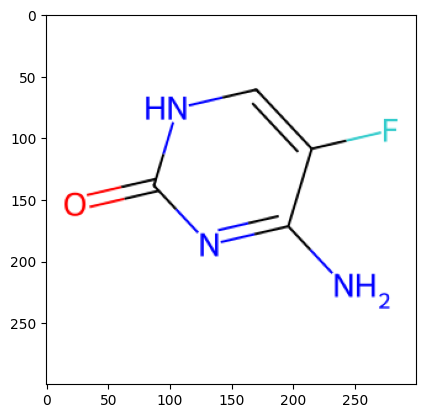

True Value: [-0.36214606], Predicted Value: -4.576338008287914


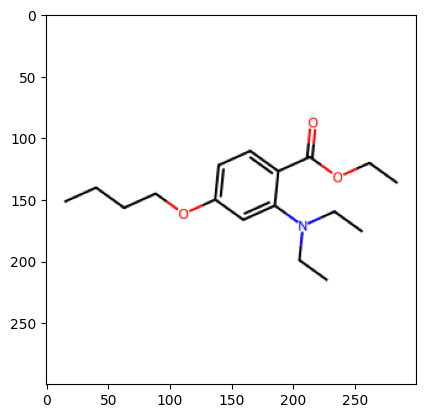

True Value: [0.64141626], Predicted Value: -1.8750844107581834


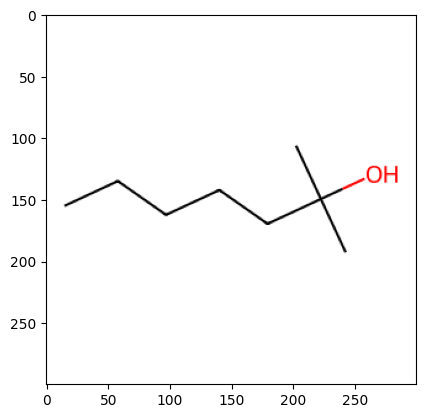

True Value: [-1.02014211], Predicted Value: -3.9428300289954157


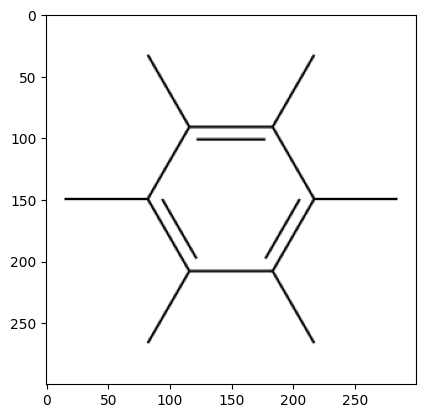

True Value: [0.40472703], Predicted Value: -2.044941834290322


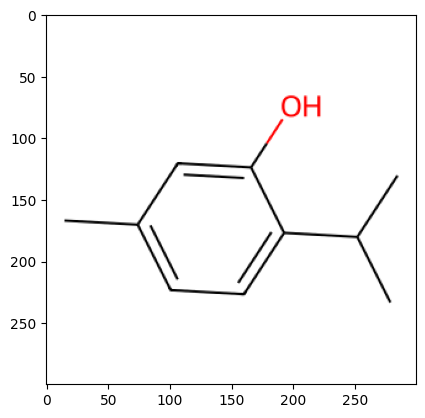

True Value: [1.46509477], Predicted Value: -0.8796970656684167


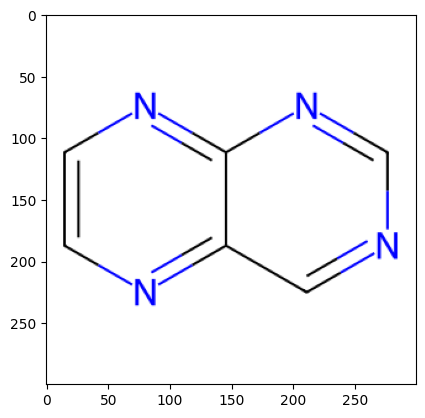

True Value: [-0.7503164], Predicted Value: -3.1287081517367192


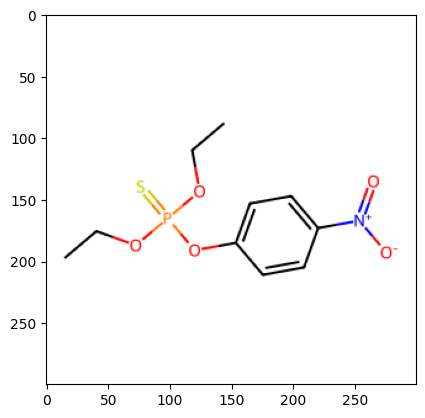

True Value: [1.02958659], Predicted Value: -2.04836610952297


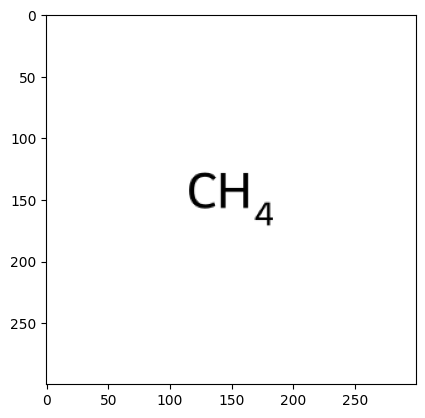

True Value: [0.96331361], Predicted Value: -1.4613623829630114


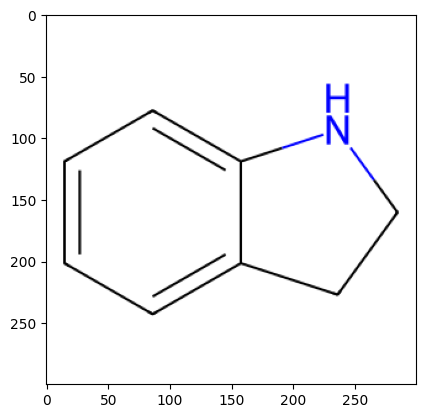

True Value: [-0.22013253], Predicted Value: -3.1987703112919457


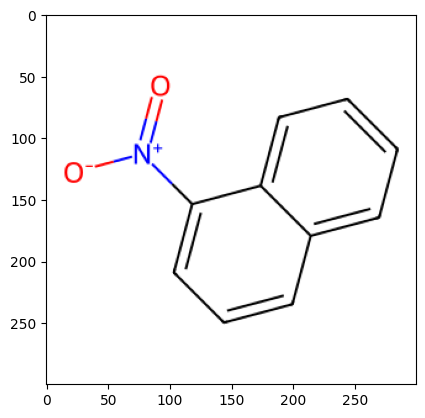

True Value: [1.13846364], Predicted Value: -0.5781309275040263


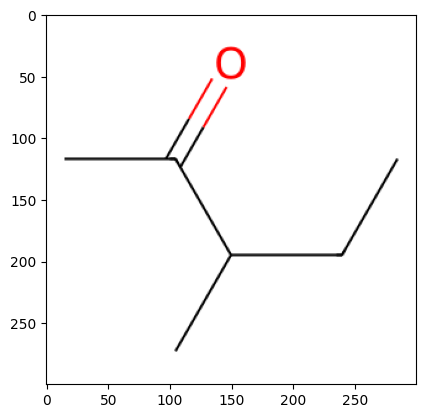

True Value: [-0.15433292], Predicted Value: -2.18400464129955


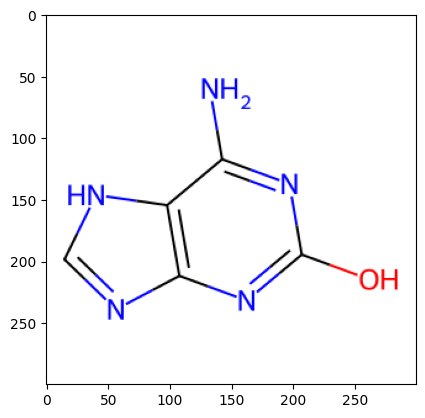

True Value: [-0.64854003], Predicted Value: -6.283098245179415


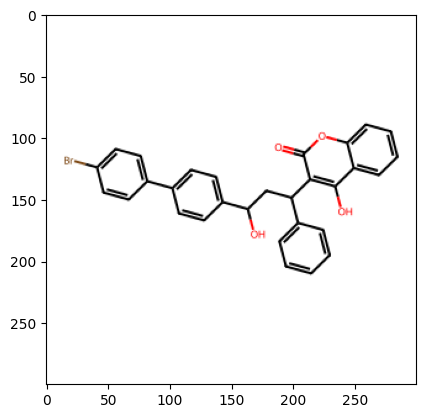

True Value: [1.5787056], Predicted Value: -0.060230373305064866


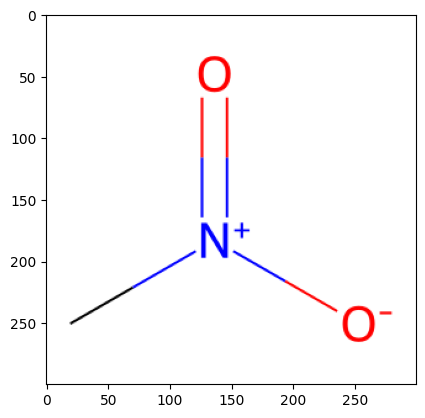

True Value: [-0.85445966], Predicted Value: -4.026806143667384


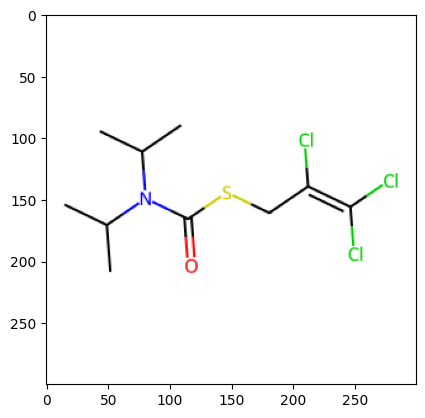

True Value: [0.18697294], Predicted Value: -2.4723699028606023


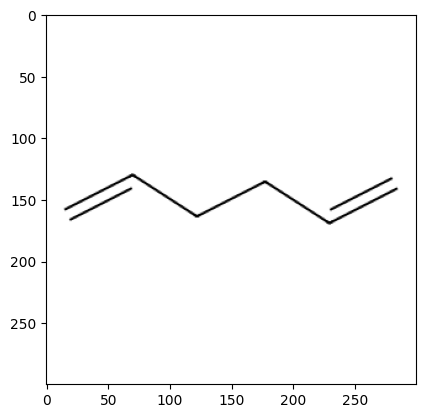

True Value: [0.73609195], Predicted Value: -1.592779734212044


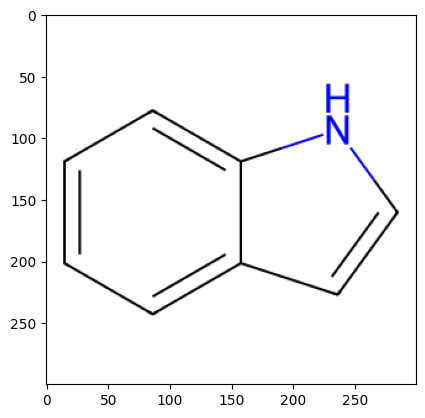

True Value: [-0.2911393], Predicted Value: -3.953881439602668


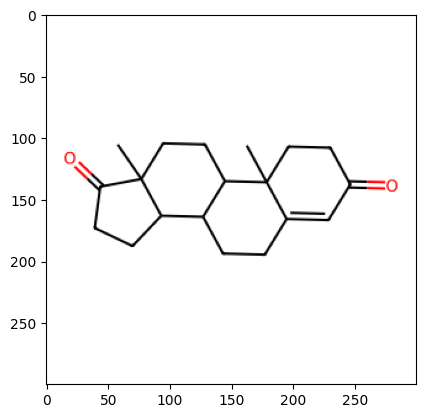

True Value: [-0.07338521], Predicted Value: -2.956854058001727


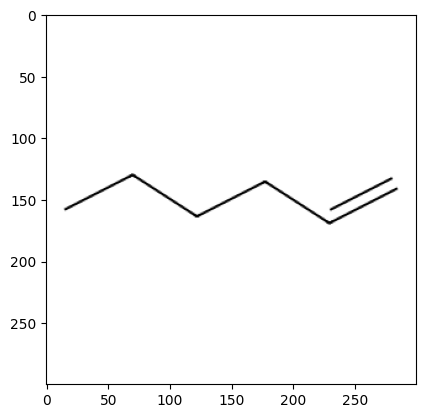

True Value: [-0.33847714], Predicted Value: -3.838772757102447


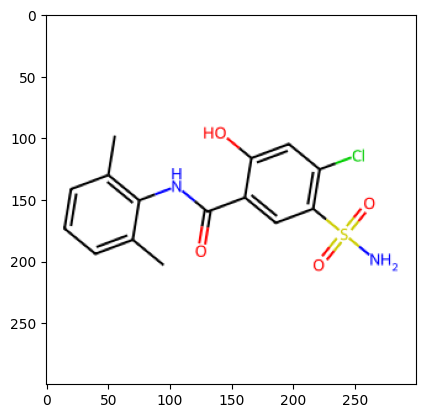

True Value: [-0.55623123], Predicted Value: -4.628152969359149


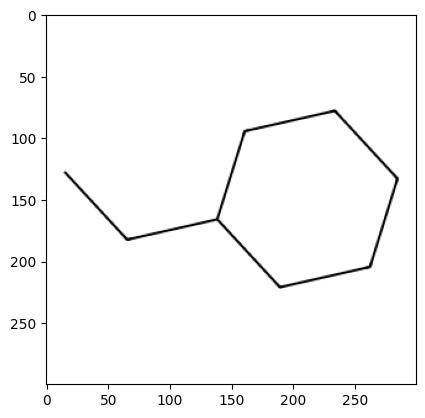

True Value: [0.23431079], Predicted Value: -2.932096040009502


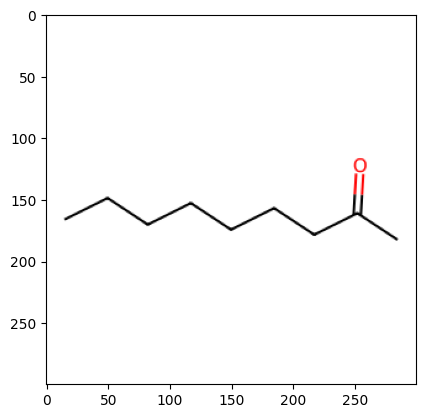

True Value: [-0.3810812], Predicted Value: -3.2031923235378317


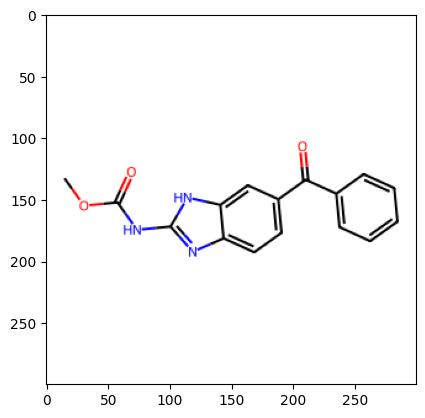

True Value: [-0.14439197], Predicted Value: -2.597176365003814


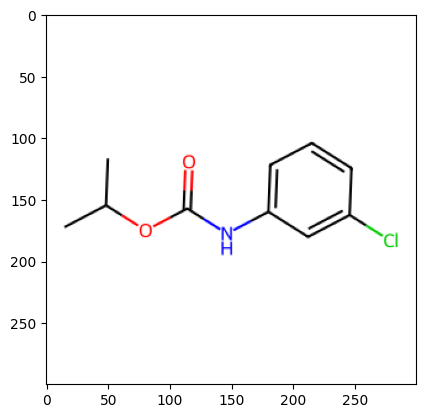

True Value: [-0.49185176], Predicted Value: -2.8226907422226506


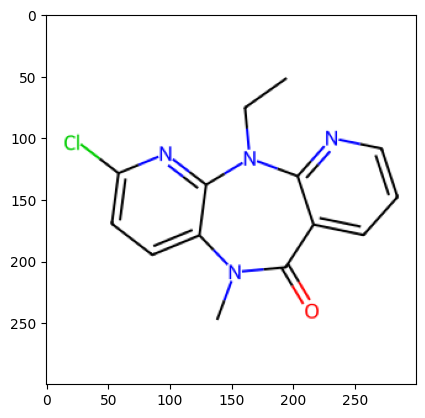

True Value: [-0.07054494], Predicted Value: -2.9335321441872506


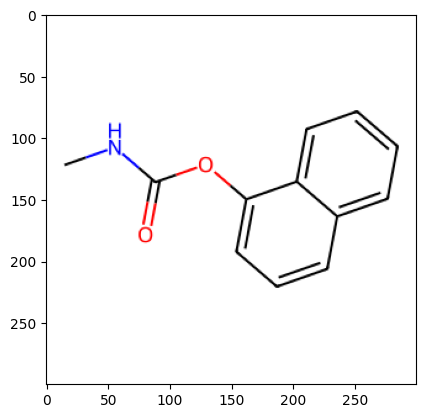

True Value: [1.59290695], Predicted Value: -0.9271968519313911


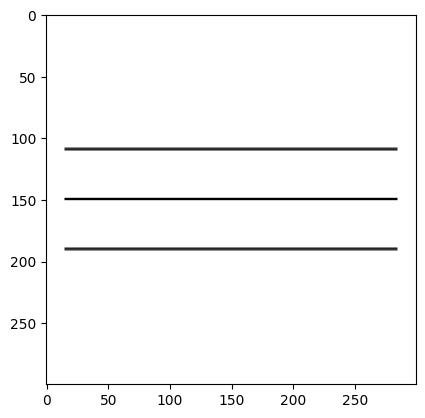

True Value: [1.63551101], Predicted Value: -0.4545533162417703


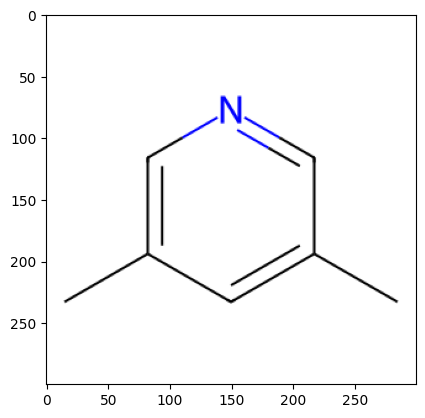

True Value: [0.48046759], Predicted Value: -2.02760004689012


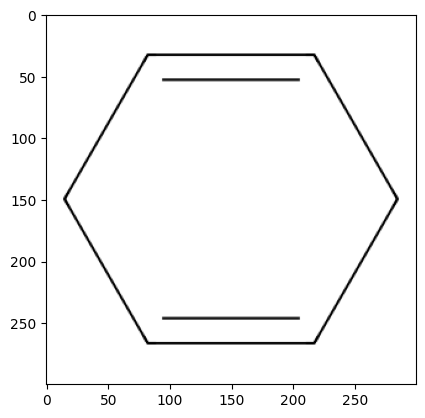

True Value: [0.26366025], Predicted Value: -3.4023308699512538


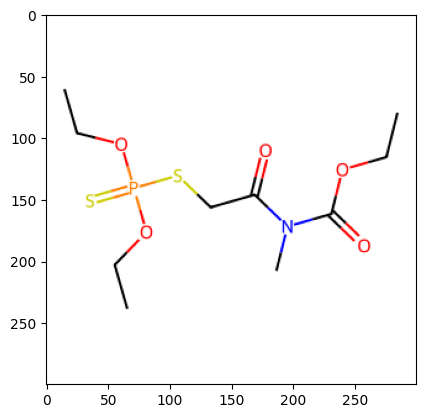

True Value: [1.02011902], Predicted Value: -0.857338136795541


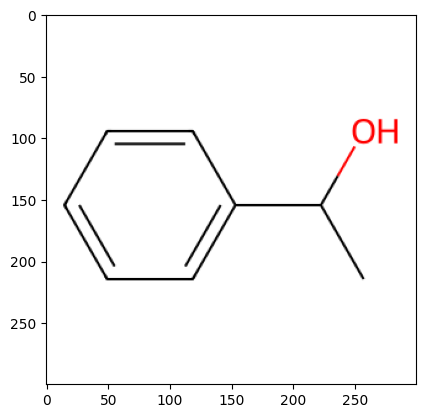

True Value: [0.69822167], Predicted Value: -1.6115439641966154


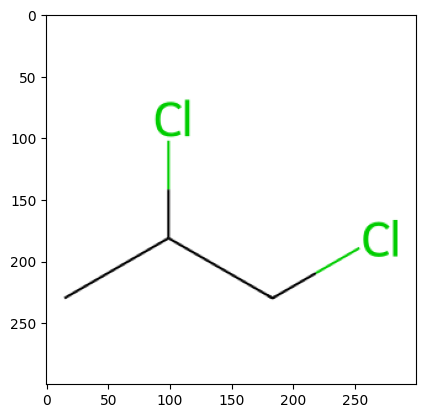

True Value: [0.2911162], Predicted Value: -1.9534082772569774


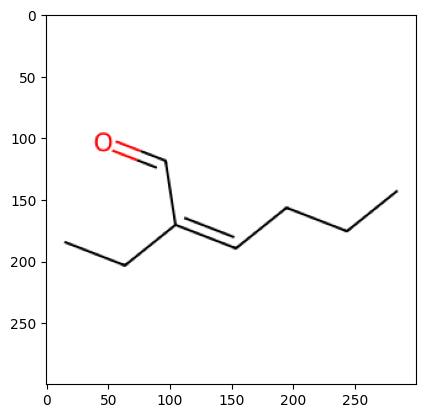

True Value: [-0.54676366], Predicted Value: -3.8231364653918347


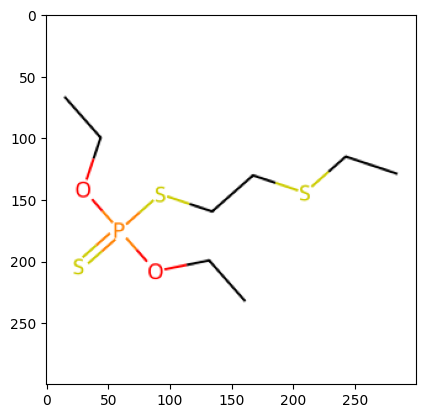

True Value: [-1.04570455], Predicted Value: -4.702515099691297


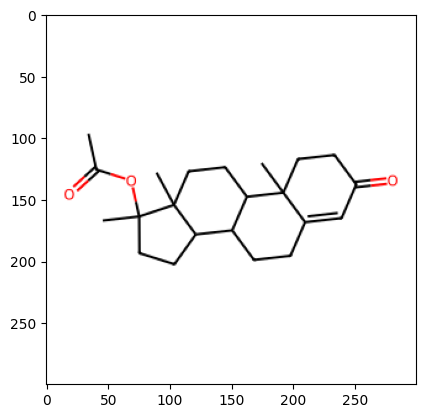

True Value: [-1.45091651], Predicted Value: -6.494577947902226


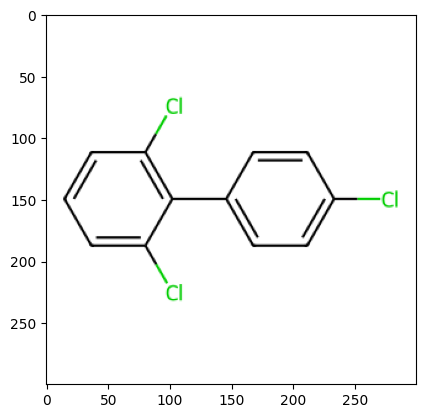

True Value: [-1.39411109], Predicted Value: -4.808400884570918


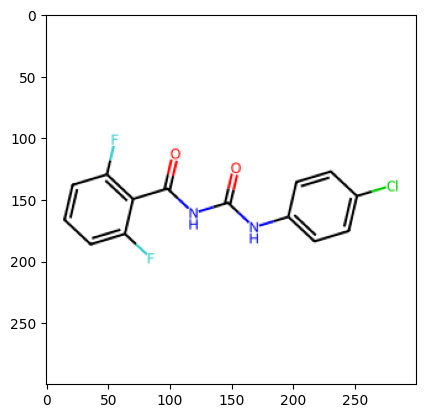

True Value: [-0.65564071], Predicted Value: -5.005083255921228


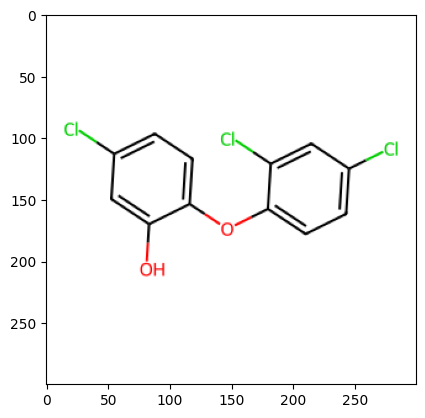

True Value: [-1.6861856], Predicted Value: -5.639310074260745


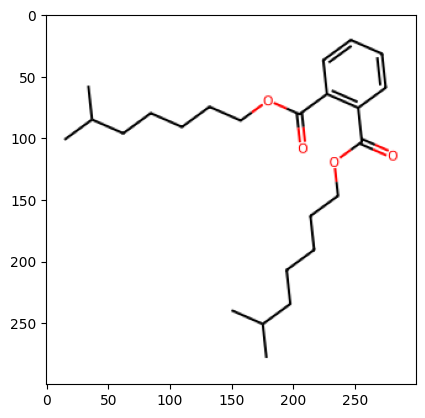

True Value: [-0.07811899], Predicted Value: -4.111661762761043


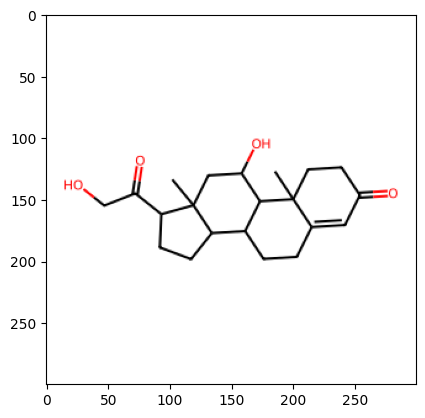

True Value: [-0.15385954], Predicted Value: -3.3241907581790744


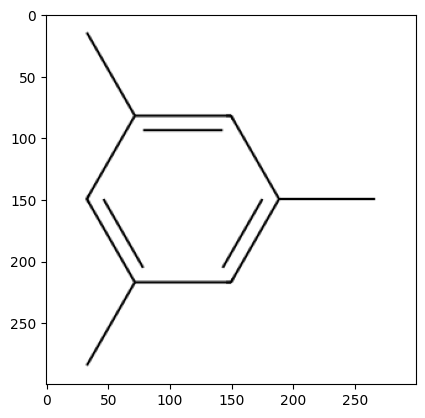

True Value: [-0.96570359], Predicted Value: -7.078345010051056


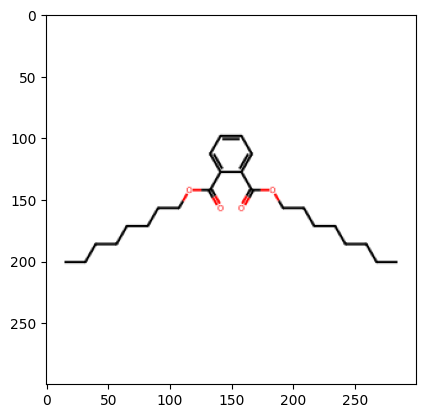

True Value: [-1.55032598], Predicted Value: -6.505129482696435


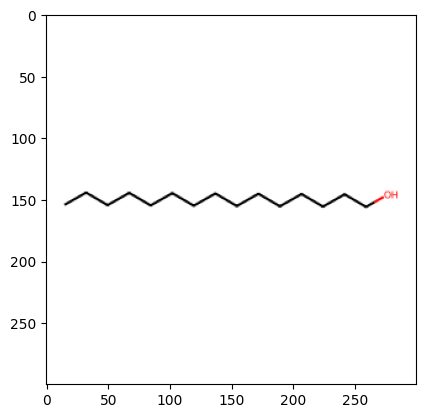

True Value: [-2.04263958], Predicted Value: -7.190697702174479


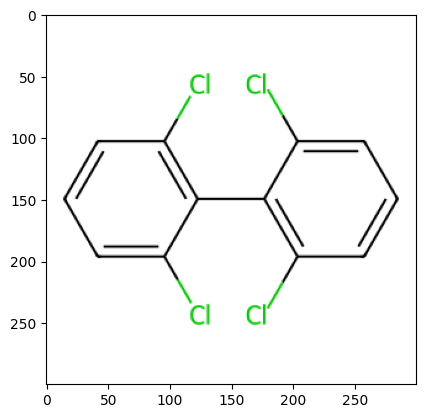

True Value: [0.63100193], Predicted Value: -1.6193466856723002


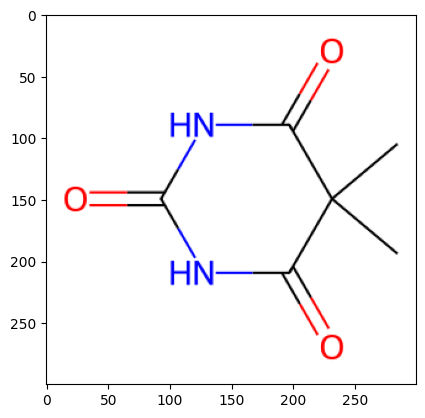

True Value: [0.46626623], Predicted Value: -2.158319838440347


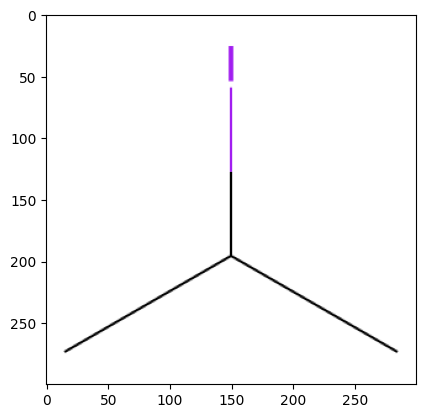

True Value: [-0.01184601], Predicted Value: -2.8347754760904107


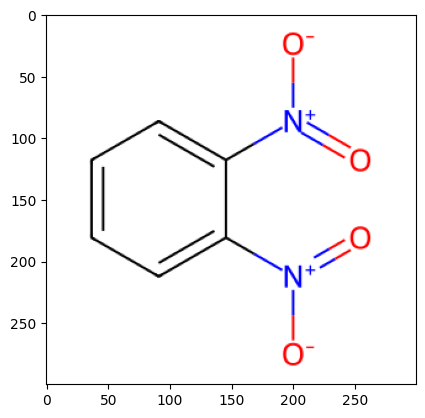

True Value: [1.39882179], Predicted Value: 0.005438198932435245


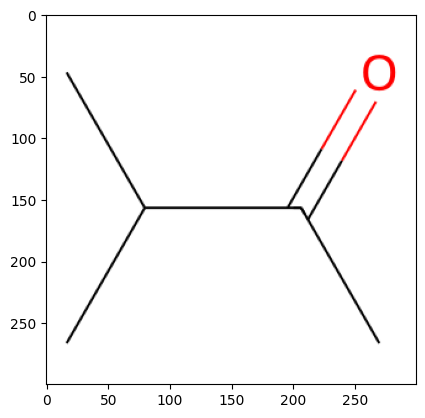

True Value: [-2.52075182], Predicted Value: -7.556265824097418


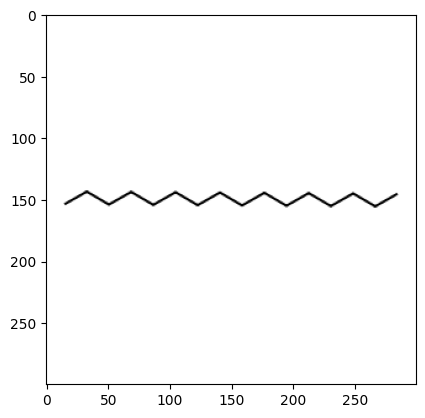

True Value: [0.63194869], Predicted Value: -1.5972886895936746


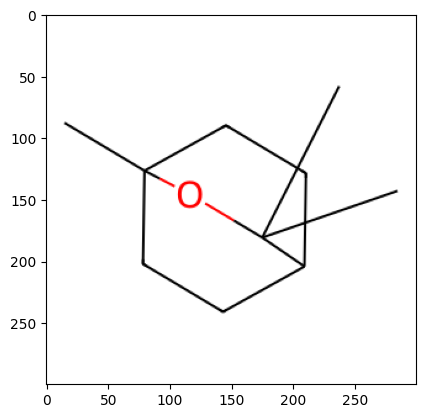

True Value: [0.4757338], Predicted Value: -3.0748923181061403


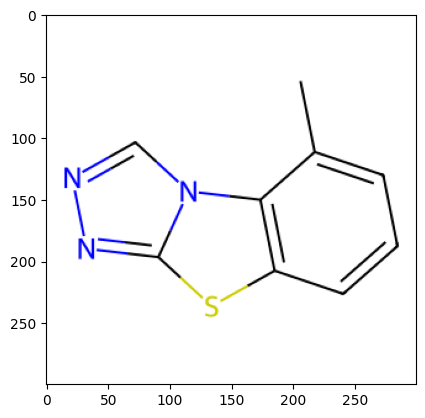

True Value: [0.48520137], Predicted Value: -2.3066174418773118


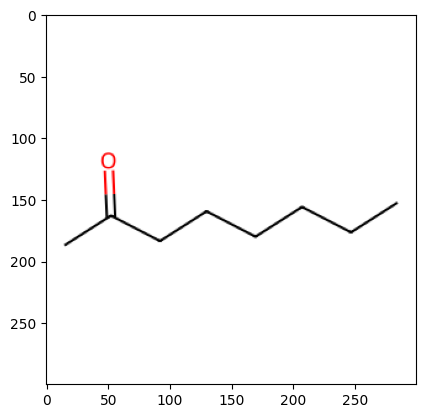

True Value: [-0.14439197], Predicted Value: -3.0991865187074783


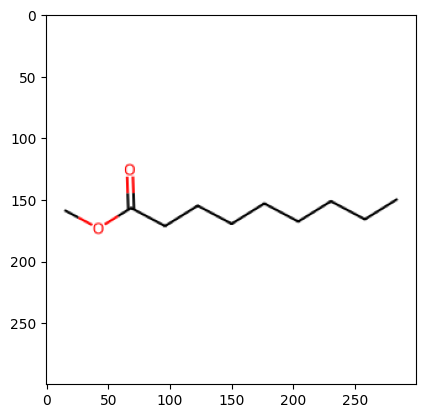

True Value: [0.52307165], Predicted Value: -2.288084451673761


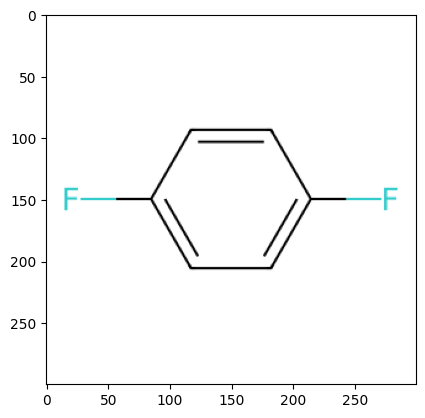

True Value: [0.18886646], Predicted Value: -2.901753924419369


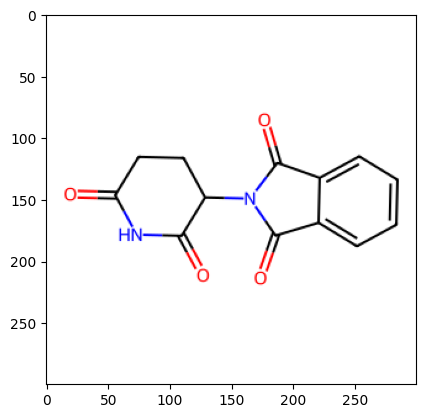

True Value: [-1.23316242], Predicted Value: -6.004397207366095


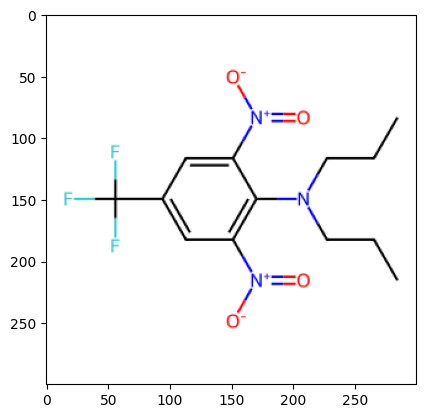

True Value: [1.9763435], Predicted Value: 0.8637798681275708


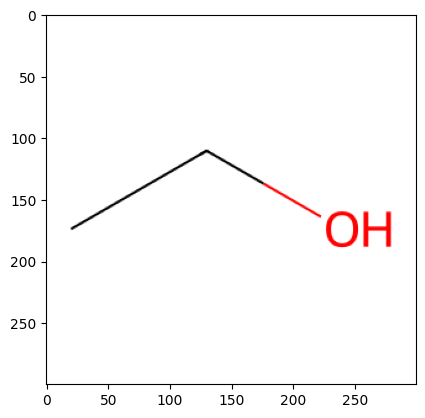

True Value: [0.34366121], Predicted Value: -2.585960070926239


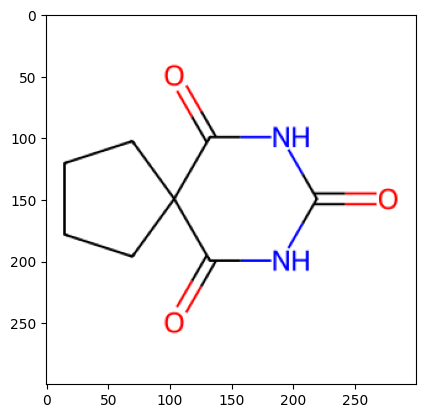

True Value: [0.58934463], Predicted Value: -2.9428653890787966


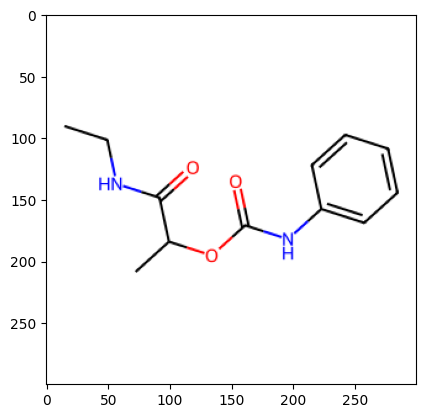

True Value: [-1.0248759], Predicted Value: -6.140390625787275


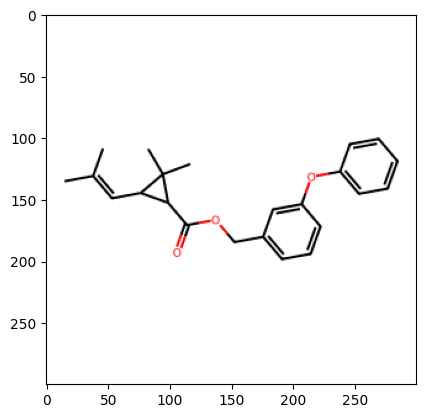

True Value: [0.40567379], Predicted Value: -3.222211952918444


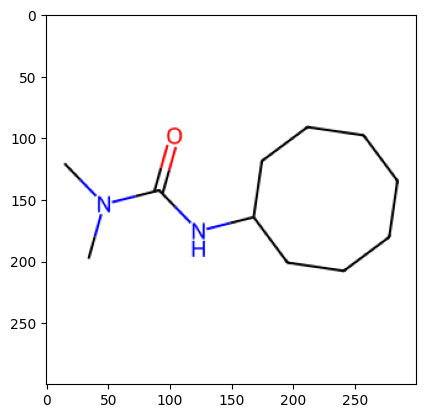

True Value: [-1.76334629], Predicted Value: -7.1452633977344675


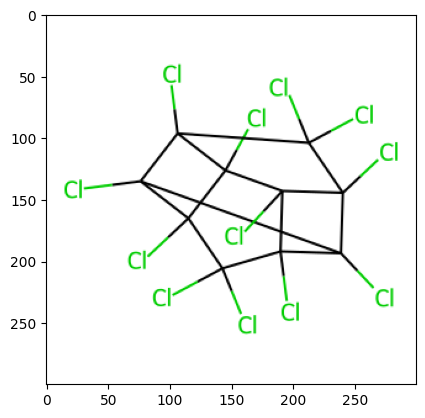

True Value: [-0.93966778], Predicted Value: -5.181701846086358


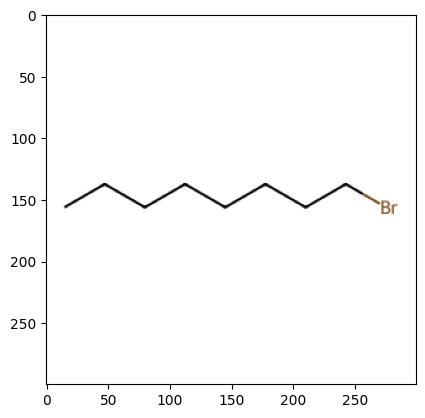

True Value: [-0.85587979], Predicted Value: -2.8676845861894886


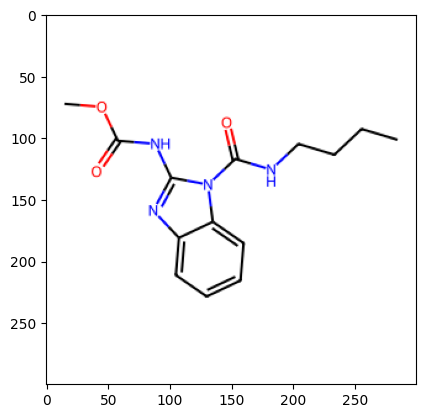

True Value: [1.28331744], Predicted Value: -3.089360401930371


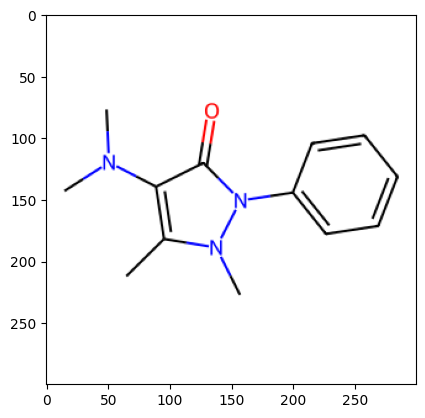

True Value: [1.34201637], Predicted Value: 0.06951900441868242


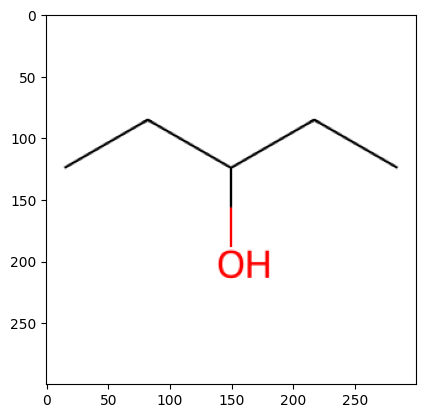

True Value: [0.27691485], Predicted Value: -1.899403180192776


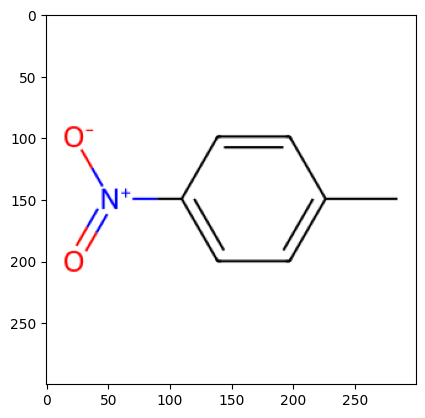

True Value: [0.91597576], Predicted Value: -0.8963808301469651


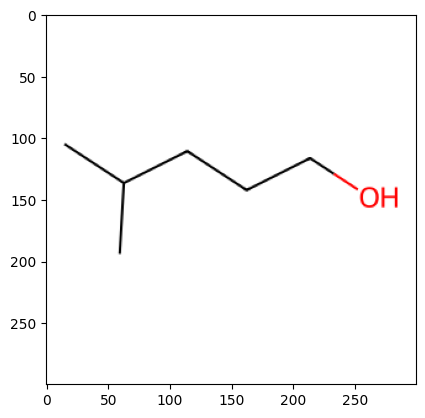

True Value: [-0.70771234], Predicted Value: -3.9123320642144526


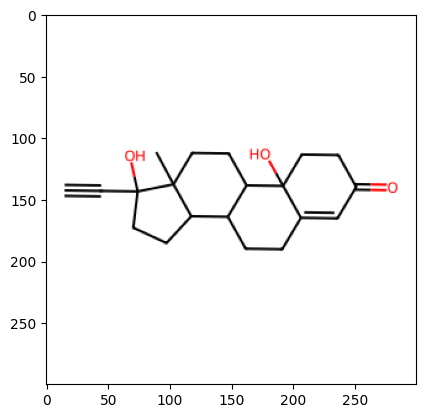

True Value: [-0.87812858], Predicted Value: -6.015740485009779


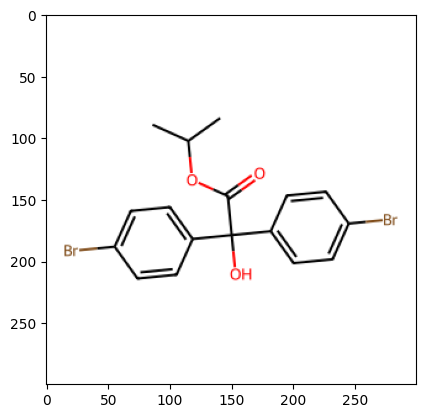

True Value: [0.09324401], Predicted Value: -2.402587239359785


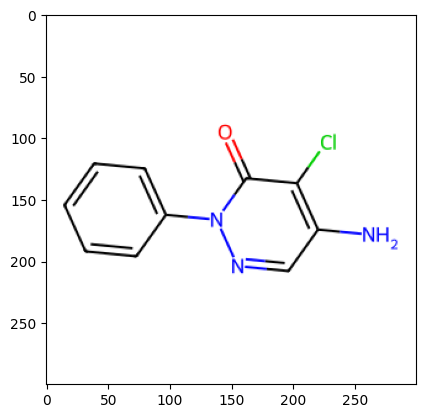

True Value: [1.52663397], Predicted Value: 0.2707785761608674


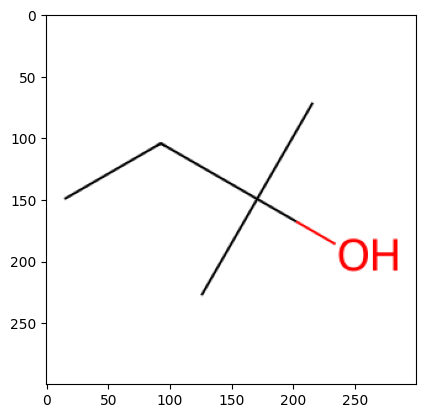

True Value: [1.11006093], Predicted Value: -0.6416635064688658


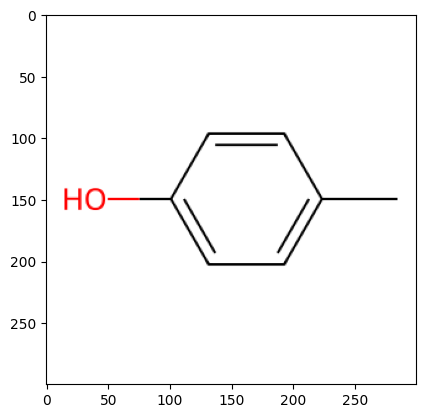

True Value: [1.52663397], Predicted Value: 0.0437017407646878


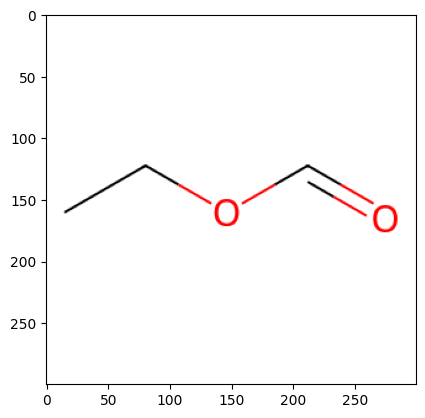

True Value: [0.54674057], Predicted Value: -1.9142316121511256


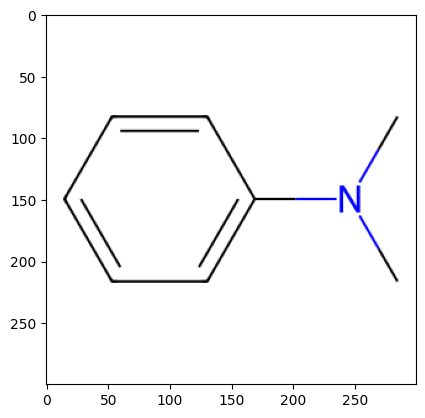

True Value: [-1.00120698], Predicted Value: -5.2520926708408275


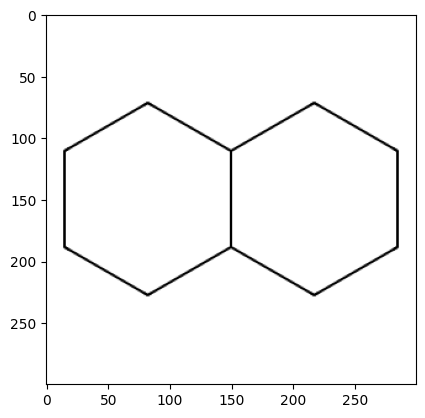

True Value: [0.42366217], Predicted Value: -1.9106444680610033


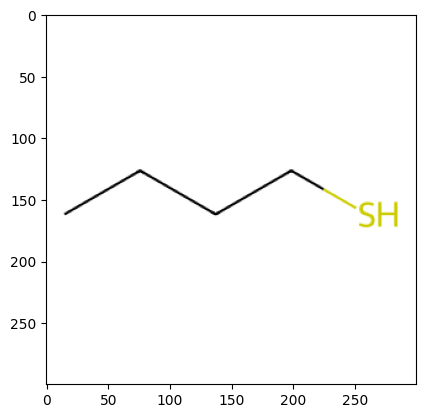

True Value: [-2.23672474], Predicted Value: -8.519428555281722


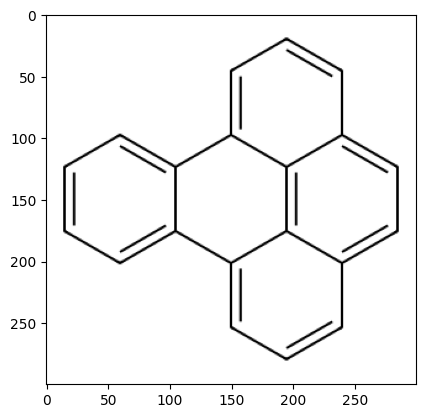

True Value: [0.25324593], Predicted Value: -2.0445263833469625


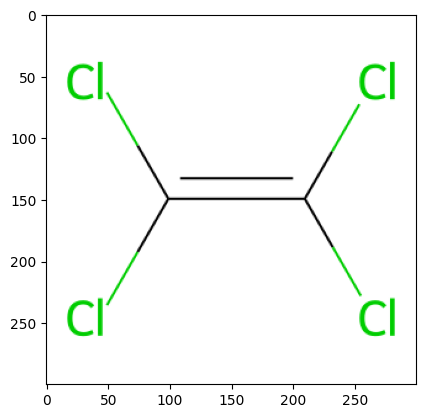

True Value: [1.32308123], Predicted Value: 0.21852556270837775


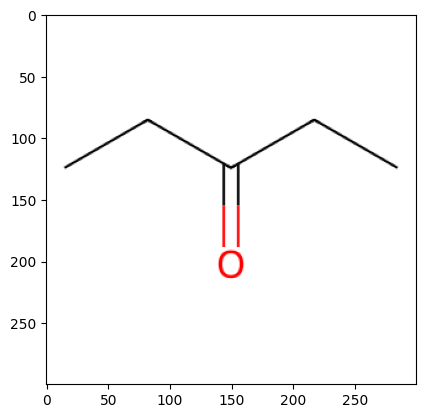

True Value: [1.52663397], Predicted Value: 0.4498736291700607


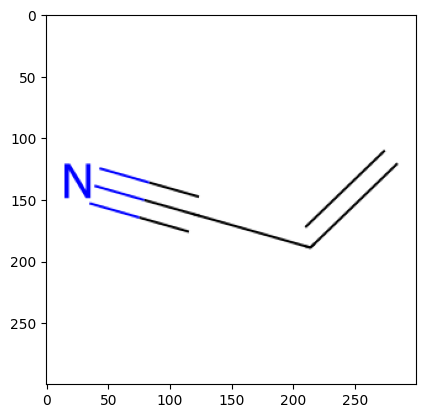

True Value: [-1.20144606], Predicted Value: -4.56261308051735


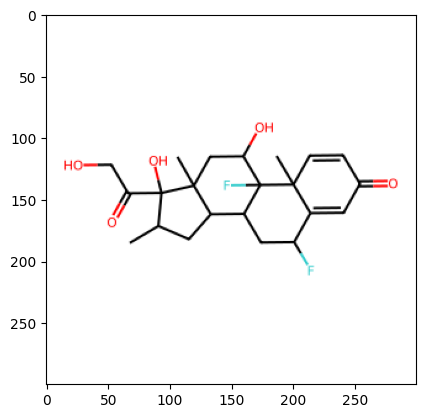

True Value: [1.07692444], Predicted Value: -1.0404931383477471


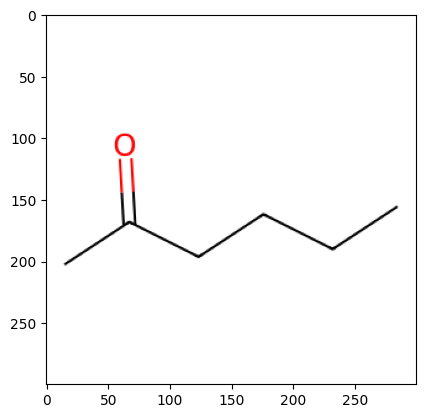

True Value: [-0.07764561], Predicted Value: -3.2518029326993303


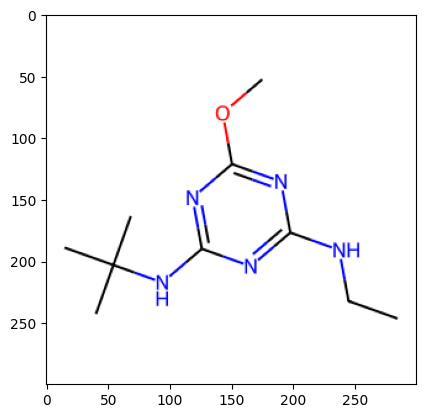

True Value: [-0.98700562], Predicted Value: -5.107954928152832


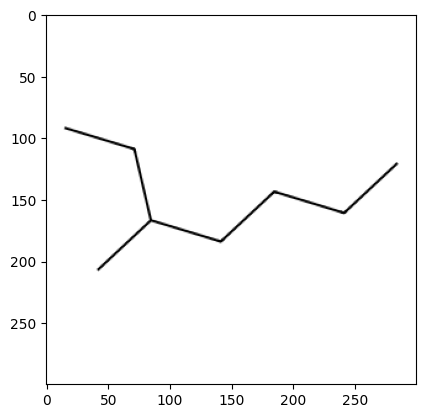

True Value: [0.6603514], Predicted Value: -1.703848488384434


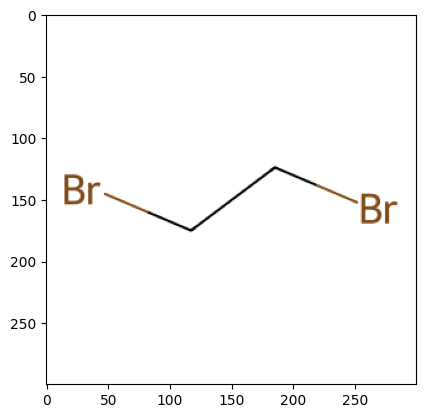

True Value: [0.10034469], Predicted Value: -1.6274453034101135


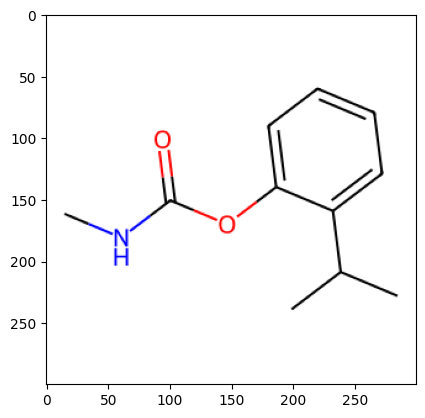

True Value: [-0.06865142], Predicted Value: -2.472509477757015


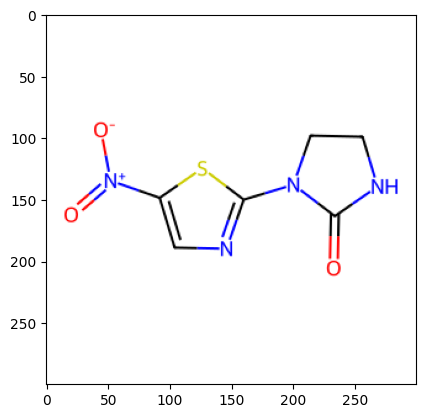

In [102]:
test_predictions = model.predict(valid_dataset, transformers)
import matplotlib.pyplot as plt
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
# Visualize predictions
def visualize_predictions(dataset, predictions):
    mols = [Chem.MolFromSmiles(smiles) for smiles in dataset.ids]
    true_values = dataset.y
    predicted_values = predictions.flatten()

    for mol, true_value, predicted_value in zip(mols, true_values, predicted_values):
        print(f"True Value: {true_value}, Predicted Value: {predicted_value}")
        img = Draw.MolToImage(mol)
        plt.imshow(img)
        plt.show()

# Visualize predictions on the test set
visualize_predictions(valid_dataset, test_predictions)